In [1]:
import numpy as np
import math

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
fea_folder = '/home/lyt/data/VQA/v2/features'
img_folder = '/home/lyt/data/COCO'
root_folder = '/home/lyt/code/vqa-concept'
obj_vocab_file = '{}/data/objects_vocab.txt'.format(root_folder)

In [4]:
with open(obj_vocab_file) as f:
    labels = ['__no_object__'] + f.read().splitlines()

In [5]:
split = 'val2014'# test2015 train2014 val2014
im_id = np.load('{}/{}_36_id.npy'.format(fea_folder, split))
box = np.load('{}/{}_36_box.npy'.format(fea_folder, split))
cls = np.load('{}/{}_36_class.npy'.format(fea_folder, split))
print(im_id.shape)
print(box.shape)
print(cls.shape)

(40504,)
(40504, 36, 4)
(40504, 36)


In [6]:
for i in range(im_id.shape[0]):
    if 240537 == im_id[i]:
        print(i)

31715


In [7]:
i = np.random.randint(im_id.shape[0])#31715#
j = np.random.randint(box.shape[1])
print(i)
print(im_id[i])
print(box[i][j])
print(cls[i][j])
print('Label: {}'.format(labels[cls[i][j]]))

26739
70865
[164.22412 314.7641  248.1136  361.38867]
837
Label: pen


(484, 640, 3)


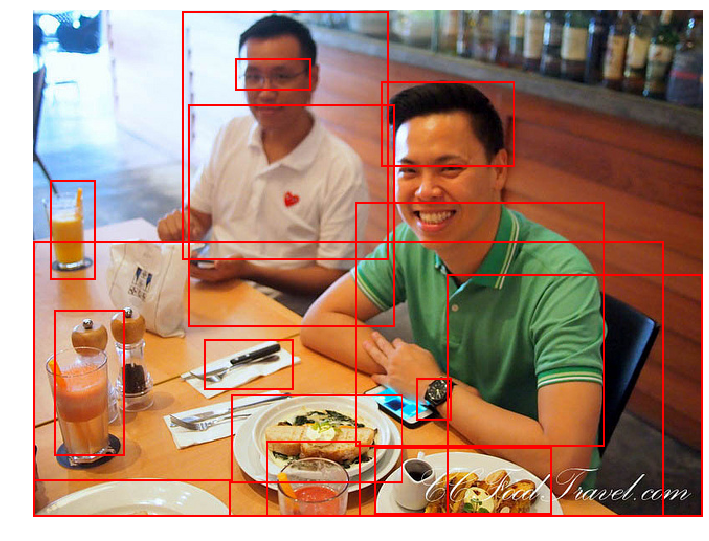

In [8]:
img = imread('{}/{}/COCO_{}_{:012}.jpg'.format(img_folder, split, split, im_id[i]))
print(img.shape)
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
for ii,bb in enumerate(box[i]):
    if ii>=15:
        break
    ax.add_patch(Rectangle((bb[0],bb[1]),bb[2]-bb[0],bb[3]-bb[1],
                       linewidth=2,edgecolor='r',facecolor='none'))
plt.axis('off')
# plt.savefig('{}/{}_{}.png'.format(root_folder, split, im_id[i]), bbox_inches='tight')
plt.show()

48 64


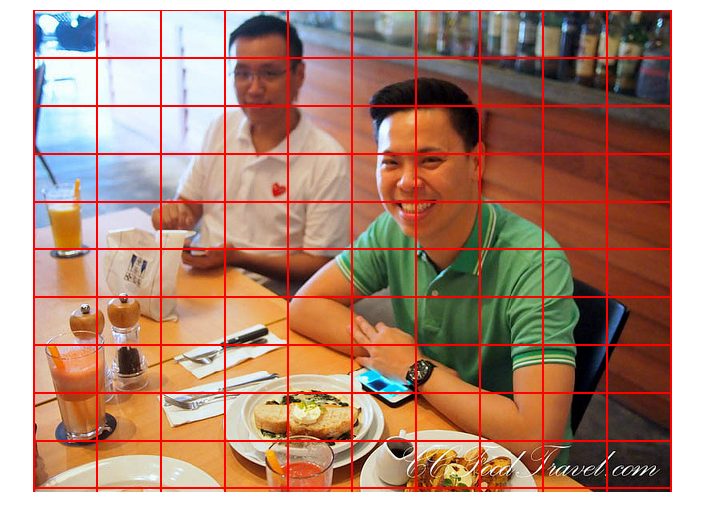

In [9]:
img = imread('{}/{}/COCO_{}_{:012}.jpg'.format(img_folder, split, split, im_id[i]))
grid_num = 10
dx, dy = math.floor(img.shape[0]/grid_num), math.floor(img.shape[1]/grid_num)
print(dx, dy)
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
for x in range(0, img.shape[0]+1, dx):
    plt.plot((0,img.shape[1]-1),(x,x), 'r-', linewidth=2)
for y in range(0, img.shape[1]+1, dy):
    plt.plot((y,y),(0,img.shape[0]-1), 'r-', linewidth=2)
plt.axis('off')
# plt.savefig('{}/{}_{}g.png'.format(root_folder, split, im_id[i]), bbox_inches='tight')
plt.show()